## Here, we used new training data generated using a new dispersion that has been updated with the scale factor found by previous models, and generate one set of models with peak information as features and one with spec points as features.


In [1]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  



## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    
    plt.title(name)
    plt.xlabel('True')
    plt.ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    print(' ')
    print('RMSE on test data:', np.sqrt(mean_squared_error(true, predicted)), 'for ', name)
    print('R^2 Score on test data:', r2_score(true, predicted), 'for', name)

    
    return

def myResiduals(testY, predictY):
    ## residuals 1
    i = 0 # resetting i
    iterations = len(testY) # gets number of dots/points
    residual_sum = 0 # initializes sum of residuals
    for i in range (0,iterations): # for every dot/point
       ys = testY # get ys of testing data
       ys = ys.values # take out indexing, data types, names
       y = ys[i]
       predict_ys = predictY.values # get ys of all dots/points
       predict_y = predict_ys[i] # get the y value of the dot/point at specfic x value i
       diff = y - predict_y # find the difference in height
       diff = abs(diff) # take the absolute value
       residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals
    residual_average = residual_sum/iterations # find the average of the residuals
    print('The average residual for predict:', round(residual_average,4)) # display average of residuals

    minY = min(ys) # find the minimum y value for testing data
    maxY = max(ys) # find the max y value for testing data
    minpredict = min(predictY) # find the min y value for the prediction data
    maxpredict = max(predictY) # find the max y value for the prediction data
    #print('minY', minY, 'maxY', maxY)
    #print('minpredict', minpredict, 'maxpredict', maxpredict)
    rangeY = minY + maxY # find the range of the testing data
    rangepredict = minpredict - maxpredict # find the range of the predictions
    #print('rangeY', rangeY)
    #print('rangepredict', rangepredict)
    residual_percent_rangepredict = (residual_average/abs(rangepredict))*100 # calculate what percent the residual is of the range
    print('Residual is this percent of predict range', round(residual_percent_rangepredict,3), '%')
    
    return

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [2]:
#Load the training data

subset = 5

peak_names = ['peak1', 'peak2', 'peak3', 'peak4']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4']
width_names = ['width1', 'width2', 'width3','width4']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4']

energy = (pd.read_csv('Training_Data/Hexagon/HexagonBias_v4.csv', header=None)*1000).round().astype(int)
energy_names = ['E_%i_mV' % item for item in list(energy.T[0])]
energy_names2 = energy_names[50:]

col_names2 = ['deltaI', 'deltaR']+ peak_names + locs_names + width_names + prom_names

col_names1 = ['deltaI', 'deltaR'] + energy_names

col_names_both = col_names2 + energy_names2



data1 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData071518_v3_2_specPoints.csv', header = None, names = col_names1)
data2 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData071518_v3_2_peakinfo.csv', header = None, names = col_names2)

col_names1a = ['deltaI', 'deltaR'] + energy_names[50:]
data1 = data1[col_names1a]
data = data2.join(data1.drop(['deltaI', 'deltaR'], axis = 1), how = 'left')
data = data[col_names_both]

X1 = data1.drop(['deltaI', 'deltaR'], axis = 1)
Y1 = data1[['deltaI', 'deltaR']]

X2 = data2.drop(['deltaI', 'deltaR', 'peak1', 'prom1', 'loc1', 'width1'], axis = 1)
Y2 = data2[['deltaI', 'deltaR']]

X = data.drop(['deltaI', 'deltaR', 'peak1', 'prom1', 'loc1', 'width1'], axis = 1)
Y = data[['deltaI', 'deltaR']]



ts1 = 0.3
rs1 = 42

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = ts1, random_state = rs1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = ts1, random_state = rs1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ts1, random_state = rs1)

data.head()
X1.head()

,E_-300_mV,E_-298_mV,E_-296_mV,E_-294_mV,E_-292_mV,E_-290_mV,E_-288_mV,E_-286_mV,E_-284_mV,E_-282_mV,...,E_482_mV,E_484_mV,E_486_mV,E_488_mV,E_490_mV,E_492_mV,E_494_mV,E_496_mV,E_498_mV,E_500_mV
0,0.230460,0.226080,0.223110,0.221330,0.220670,0.221080,0.222490,0.224990,0.22866,0.23341,...,0.89751,0.90127,0.90712,0.91510,0.92527,0.93710,0.95144,0.96709,0.98415,1.00280
1,0.397700,0.402440,0.409140,0.417940,0.428740,0.441670,0.457110,0.475020,0.49593,0.51998,...,1.02250,1.01980,1.01650,1.01280,1.00860,1.00380,0.99878,0.99313,0.98720,0.98084
2,0.134870,0.131630,0.129330,0.127730,0.126830,0.126580,0.126840,0.127810,0.12944,0.13162,...,0.63471,0.63079,0.63002,0.63250,0.63842,0.64729,0.66043,0.67708,0.69752,0.72252
3,0.095649,0.094404,0.093774,0.093708,0.094072,0.094908,0.096207,0.097985,0.10043,0.10344,...,0.69236,0.73635,0.78854,0.84934,0.92004,1.00170,1.09650,1.20300,1.32070,1.44950
4,0.226090,0.221410,0.218150,0.216060,0.215070,0.215130,0.216170,0.218260,0.22146,0.22569,...,0.88496,0.88589,0.88905,0.89451,0.90234,0.91204,0.92446,0.93852,0.95434,0.97213


In [3]:
data1.head()

,deltaI,deltaR,E_-300_mV,E_-298_mV,E_-296_mV,E_-294_mV,E_-292_mV,E_-290_mV,E_-288_mV,E_-286_mV,...,E_482_mV,E_484_mV,E_486_mV,E_488_mV,E_490_mV,E_492_mV,E_494_mV,E_496_mV,E_498_mV,E_500_mV
0,0.81472,-0.147980,0.230460,0.226080,0.223110,0.221330,0.220670,0.221080,0.222490,0.224990,...,0.89751,0.90127,0.90712,0.91510,0.92527,0.93710,0.95144,0.96709,0.98415,1.00280
1,0.12699,-0.136070,0.397700,0.402440,0.409140,0.417940,0.428740,0.441670,0.457110,0.475020,...,1.02250,1.01980,1.01650,1.01280,1.00860,1.00380,0.99878,0.99313,0.98720,0.98084
2,0.63236,-1.417600,0.134870,0.131630,0.129330,0.127730,0.126830,0.126580,0.126840,0.127810,...,0.63471,0.63079,0.63002,0.63250,0.63842,0.64729,0.66043,0.67708,0.69752,0.72252
3,0.27850,-0.711760,0.095649,0.094404,0.093774,0.093708,0.094072,0.094908,0.096207,0.097985,...,0.69236,0.73635,0.78854,0.84934,0.92004,1.00170,1.09650,1.20300,1.32070,1.44950
4,0.95751,-0.055153,0.226090,0.221410,0.218150,0.216060,0.215070,0.215130,0.216170,0.218260,...,0.88496,0.88589,0.88905,0.89451,0.90234,0.91204,0.92446,0.93852,0.95434,0.97213


In [4]:
data2.head()

,deltaI,deltaR,peak1,peak2,peak3,peak4,loc1,loc2,loc3,loc4,width1,width2,width3,width4,prom1,prom2,prom3,prom4
0,0.81472,-0.147980,5.5745,3.6106,2.7950,2.0813,-0.346,-0.222,-0.046,0.172,0.011448,0.023365,0.034081,0.042351,5.3538,3.2320,2.25570,1.36980
1,0.12699,-0.136070,3.0223,2.1076,1.6691,1.3519,-0.356,-0.240,-0.070,0.142,0.018795,0.034884,0.048754,0.064444,2.6285,1.5022,0.88342,0.49671
2,0.63236,-1.417600,9.3618,6.2231,4.6573,3.3813,-0.344,-0.220,-0.042,0.178,0.007165,0.014209,0.022049,0.028413,9.2352,5.9967,4.31750,2.87550
3,0.27850,-0.711760,13.2120,8.4385,6.1434,4.2624,-0.348,-0.226,-0.052,0.164,0.005084,0.010339,0.016618,0.022417,13.1180,8.2660,5.88590,3.83440
4,0.95751,-0.055153,5.7110,3.6955,2.8587,2.1300,-0.346,-0.222,-0.046,0.174,0.011277,0.023000,0.033534,0.041668,5.4959,3.3257,2.32940,1.42770


# Using the Best Models on the Hexagon Data 

## Statsmodels

### Spec Points

 
RMSE on test data: 0.4783548486976088 for  Delta I
R^2 Score on test data: -1.7216512229240934 for Delta I
 
RMSE on test data: 0.5080545118478969 for  Delta R
R^2 Score on test data: -0.25716267609646026 for Delta R
The average residual for predict: 0.0404
Residual is this percent of predict range 0.15 %
The average residual for predict: 0.0356
Residual is this percent of predict range 0.108 %


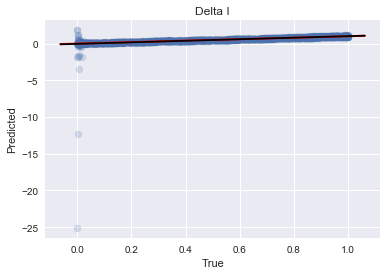

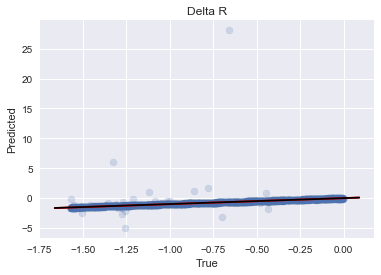

In [5]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_sp = sm.OLS(Y1_train['deltaI'], X1_train)
model_OLS_R_sp = sm.OLS(Y1_train['deltaR'], X1_train)

results_OLS_I_sp = model_OLS_I_sp.fit()
results_OLS_R_sp = model_OLS_R_sp.fit()

#Make predictions on testing data
predictions_OLS_I_sp = results_OLS_I_sp.predict(X1_test) # make the predictions by the model
predictions_OLS_R_sp = results_OLS_R_sp.predict(X1_test)

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y1_test['deltaI'], predictions_OLS_I_sp,'Delta I')
plotSummary(Y1_test['deltaR'], predictions_OLS_R_sp, 'Delta R')

myResiduals(Y1_test['deltaI'], predictions_OLS_I_sp)
myResiduals(Y1_test['deltaR'], predictions_OLS_R_sp)


### peak info

 
RMSE on test data: 0.13500934422621205 for  Delta I
R^2 Score on test data: 0.783199756942566 for Delta I
 
RMSE on test data: 0.21905013565928838 for  Delta R
R^2 Score on test data: 0.7663004335749231 for Delta R
The average residual for predict: 0.1089
Residual is this percent of predict range 6.68 %
The average residual for predict: 0.1553
Residual is this percent of predict range 4.099 %


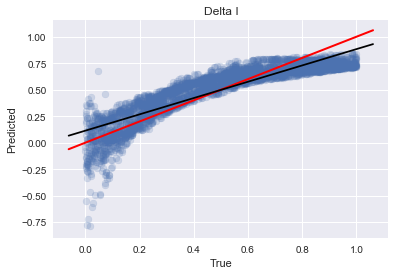

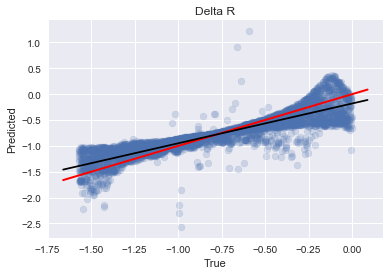

In [6]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_pi = sm.OLS(Y2_train['deltaI'], X2_train)
model_OLS_R_pi = sm.OLS(Y2_train['deltaR'], X2_train)

results_OLS_I_pi = model_OLS_I_pi.fit()
results_OLS_R_pi = model_OLS_R_pi.fit()

#Make predictions on testing data
predictions_OLS_I_pi = results_OLS_I_pi.predict(X2_test) # make the predictions by the model
predictions_OLS_R_pi = results_OLS_R_pi.predict(X2_test)

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y2_test['deltaI'], predictions_OLS_I_pi,'Delta I')
plotSummary(Y2_test['deltaR'], predictions_OLS_R_pi, 'Delta R')

myResiduals(Y2_test['deltaI'], predictions_OLS_I_pi)
myResiduals(Y2_test['deltaR'], predictions_OLS_R_pi)



### spec points and peak info

 
RMSE on test data: 1.6521662217064752 for  Delta I
R^2 Score on test data: -31.466807559972374 for Delta I
 
RMSE on test data: 0.7149447628953373 for  Delta R
R^2 Score on test data: -1.4895212183466788 for Delta R
The average residual for predict: 0.0635
Residual is this percent of predict range 0.055 %
The average residual for predict: 0.0423
Residual is this percent of predict range 0.079 %


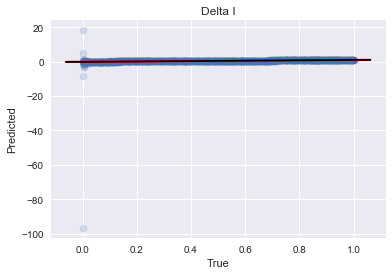

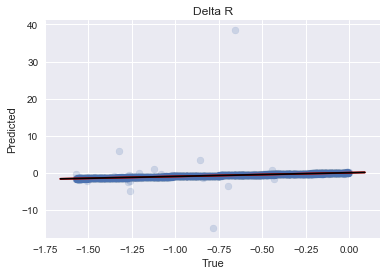

In [7]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_both = sm.OLS(Y_train['deltaI'], X_train)
model_OLS_R_both = sm.OLS(Y_train['deltaR'], X_train)

results_OLS_I_both = model_OLS_I_both.fit()
results_OLS_R_both = model_OLS_R_both.fit()

#Make predictions on testing data
predictions_OLS_I_both = results_OLS_I_both.predict(X_test) # make the predictions by the model
predictions_OLS_R_both = results_OLS_R_both.predict(X_test)

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_test['deltaI'], predictions_OLS_I_both,'Delta I')
plotSummary(Y_test['deltaR'], predictions_OLS_R_both, 'Delta R')

myResiduals(Y_test['deltaI'], predictions_OLS_I_both)
myResiduals(Y_test['deltaR'], predictions_OLS_R_both)

## Decision Tree

### spec points

 
RMSE on test data: 0.010559056546054001 for  deltaI Depth 60
R^2 Score on test data: 0.998673881479526 for deltaI Depth 60
 
RMSE on test data: 0.011327725793107273 for  deltaR Depth 60
R^2 Score on test data: 0.9993750341181471 for deltaR Depth 60


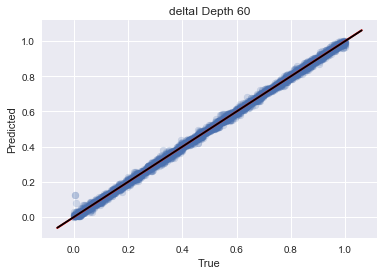

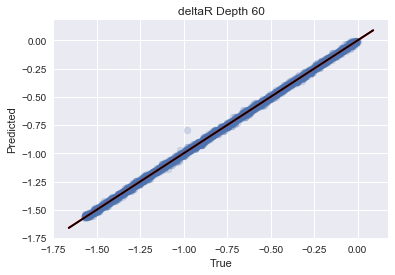

In [8]:
#Initialize the model
rs = 42
regr_DT_sp = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_sp = regr_DT_sp.fit(X1_train, Y1_train)

#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_sp = regr_DT_sp.predict(X1_test)

#Plot results
plotSummary(Y1_test['deltaI'], predictions_DT_sp[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y1_test['deltaR'], predictions_DT_sp[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])


In [9]:
# spec info decision tree feature importances 
FI_sp_DT = pd.DataFrame(regr_DT_sp.feature_importances_.T, columns = ['Spec - DT'])
FI_sp_DT.index = X1_train.columns

#print(FI_sp_DT[FI_sp_DT['Spec - DT']>0.001])
features_sp_DT = (FI_sp_DT[FI_sp_DT['Spec - DT']>0.006])
features_sp_DT_sorted = features_sp_DT.sort_values('Spec - DT', ascending = False)

### peak info

 
RMSE on test data: 0.015206667611547335 for  deltaI Depth 60
R^2 Score on test data: 0.9972495724116633 for deltaI Depth 60
 
RMSE on test data: 0.019386651936082668 for  deltaR Depth 60
R^2 Score on test data: 0.9981694715629246 for deltaR Depth 60


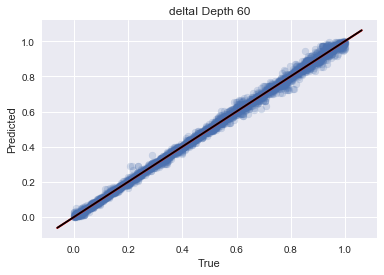

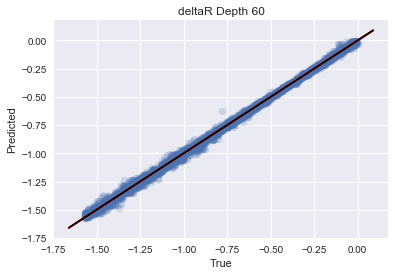

In [10]:
#Initialize the model
rs = 42
regr_DT_pi = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_pi.fit(X2_train, Y2_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_pi = regr_DT_pi.predict(X2_test)

#Plot results
plotSummary(Y2_test['deltaI'], predictions_DT_pi[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y2_test['deltaR'], predictions_DT_pi[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])


In [11]:
# peak info decision tree feature importances 
FI_pi_DT = pd.DataFrame(regr_DT_pi.feature_importances_.T, columns = ['Peak - DT'])
FI_pi_DT.index = X2_train.columns

#print(FI_pi_DT[FI_sp_DT['Peak - DT']>0.001])
features_pi_DT = (FI_pi_DT[FI_pi_DT['Peak - DT']>0.006])
features_pi_DT_sorted = features_pi_DT.sort_values('Peak - DT', ascending = False)

### spec points and peak info

 
RMSE on test data: 0.01002112421558203 for  deltaI Depth 60
R^2 Score on test data: 0.9988055581816249 for deltaI Depth 60
 
RMSE on test data: 0.011068069032899006 for  deltaR Depth 60
R^2 Score on test data: 0.9994033569691624 for deltaR Depth 60


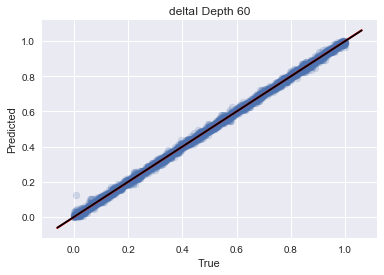

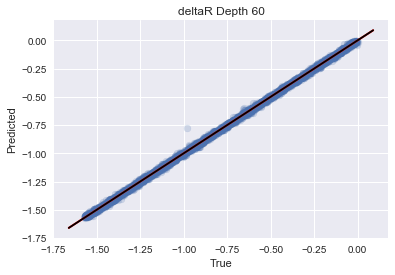

In [12]:
#Initialize the model
rs = 42
regr_DT_both = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_both.fit(X_train, Y_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_both = regr_DT_both.predict(X_test)

#Plot results
plotSummary(Y_test['deltaI'], predictions_DT_both[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y_test['deltaR'], predictions_DT_both[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])


In [13]:
# combined info decision tree feature importances 
FI_b_DT = pd.DataFrame(regr_DT_both.feature_importances_.T, columns = ['Both - DT'])
FI_b_DT.index = X_train.columns

#print(FI_b_DT[FI_b_DT['Both - DT']>0.001])
features_b_DT = (FI_b_DT[FI_b_DT['Both - DT']>0.006])
features_b_DT_sorted = features_b_DT.sort_values('Both - DT', ascending = False)

In [14]:
display_side_by_side(features_sp_DT_sorted, features_pi_DT_sorted, features_b_DT_sorted)

,Spec - DT
E_492_mV,0.532020
E_-294_mV,0.113655
E_436_mV,0.103140
E_-124_mV,0.036013
E_354_mV,0.035532
E_76_mV,0.034473
E_10_mV,0.027540
E_-196_mV,0.014200
E_-208_mV,0.007765
E_424_mV,0.007706


## Random Forest

### spec points

 
RMSE on test data: 0.0033594036067430815 for  deltaI 10
R^2 Score on test data: 0.9998657678712901 for deltaI 10
 
RMSE on test data: 0.0036967659189332197 for  deltaR 10
R^2 Score on test data: 0.9999334397787187 for deltaR 10


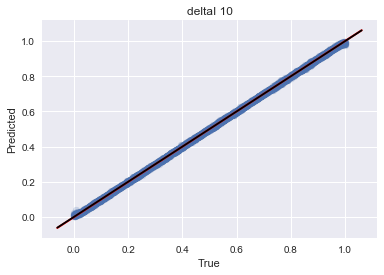

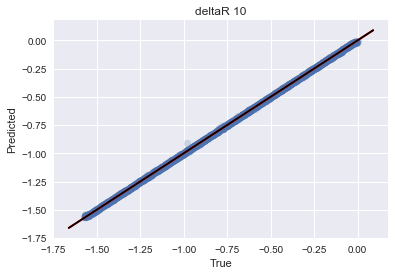

In [15]:
rs = 42
regr_RF_sp = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_sp = regr_RF_sp.fit(X1_train, Y1_train)

predictions_RF_sp = model_RF_sp.predict(X1_test)

plotSummary(Y1_test['deltaI'], predictions_RF_sp[:,0], 'deltaI 10')
plotSummary(Y1_test['deltaR'], predictions_RF_sp[:,1], 'deltaR 10')


In [16]:
# spec info random forest feature importances 
FI_sp_RF = pd.DataFrame(regr_RF_sp.feature_importances_.T, columns = ['Spec - RF'])
FI_sp_RF.index = X1_train.columns

#print(FI_sp_RF[FI_sp_RF['Spec - RF']>0.001])
features_sp_RF = (FI_sp_RF[FI_sp_RF['Spec - RF']>0.006])
features_sp_RF_sorted = features_sp_RF.sort_values('Spec - RF', ascending = False)

### peak info

 
RMSE on test data: 0.012056102747006915 for  deltaI 10
R^2 Score on test data: 0.9982711950782124 for deltaI 10
 
RMSE on test data: 0.014580546010702791 for  deltaR 10
R^2 Score on test data: 0.9989645755187063 for deltaR 10


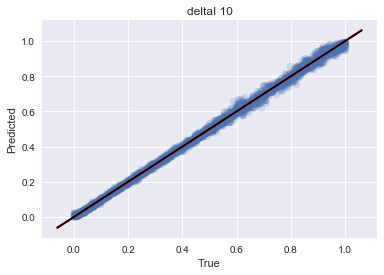

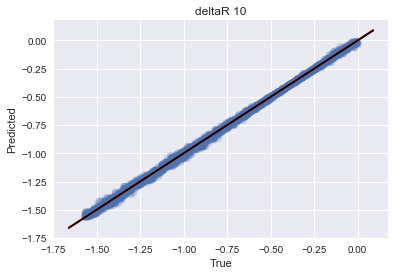

In [17]:
rs = 42
regr_RF_pi = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_pi = regr_RF_pi.fit(X2_train, Y2_train)

predictions_RF_pi = model_RF_pi.predict(X2_test)

plotSummary(Y2_test['deltaI'], predictions_RF_pi[:,0], 'deltaI 10')
plotSummary(Y2_test['deltaR'], predictions_RF_pi[:,1], 'deltaR 10')

In [18]:
# peak info random forest feature importances 
FI_pi_RF = pd.DataFrame(regr_RF_pi.feature_importances_.T, columns = ['Peak - RF'])
FI_pi_RF.index = X2_train.columns

#print(FI_pi_RF[FI_sp_RF['Peak - RF']>0.001])
features_pi_RF = (FI_pi_RF[FI_pi_RF['Peak - RF']>0.006])
features_pi_RF_sorted = features_pi_RF.sort_values('Peak - RF', ascending = False)

### spec points and peak info

 
RMSE on test data: 0.0033229664210131338 for  deltaI 10
R^2 Score on test data: 0.9998686639306282 for deltaI 10
 
RMSE on test data: 0.003690509354332997 for  deltaR 10
R^2 Score on test data: 0.9999336648867911 for deltaR 10


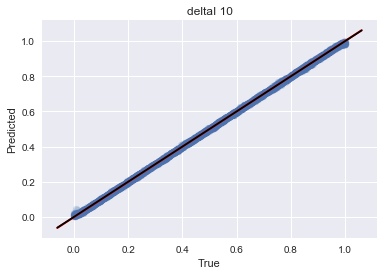

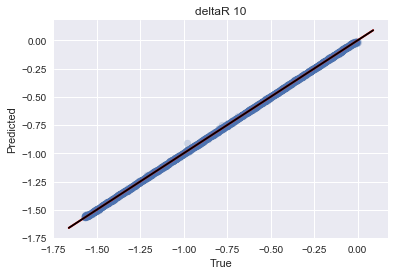

In [19]:
rs = 42
regr_RF_both = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_both = regr_RF_both.fit(X_train, Y_train)

predictions_RF_both = model_RF_both.predict(X_test)

plotSummary(Y_test['deltaI'], predictions_RF_both[:,0], 'deltaI 10')
plotSummary(Y_test['deltaR'], predictions_RF_both[:,1], 'deltaR 10')

In [20]:
# combined info decision tree feature importances 
FI_b_RF = pd.DataFrame(regr_RF_both.feature_importances_.T, columns = ['Both - RF'])
FI_b_RF.index = X_train.columns

#print(FI_b_RF[FI_b_RF['Both - RF']>0.001])
features_b_RF = (FI_b_RF[FI_b_RF['Both - RF']>0.006])
features_b_RF_sorted = features_b_RF.sort_values('Both - RF', ascending = False)

In [21]:
display_side_by_side(features_pi_RF_sorted, features_sp_RF_sorted, features_b_RF_sorted)

,Peak - RF
prom4,0.496228
loc4,0.173653
loc2,0.095497
peak4,0.084955
loc3,0.051227
width3,0.019340
peak2,0.018394
prom2,0.018019
width4,0.017542
prom3,0.010180


## Independent Random Forests

### spec points


Score - Random Forest: 0.9999769675387583 for delta I/R 10
 
RMSE on test data: 0.0021746268585937784 for  deltaI 10
R^2 Score on test data: 0.9999769675387582 for deltaI 10
 
RMSE on test data: 0.0036481836431421716 for  deltaR 10
R^2 Score on test data: 0.9998416983313281 for deltaR 10


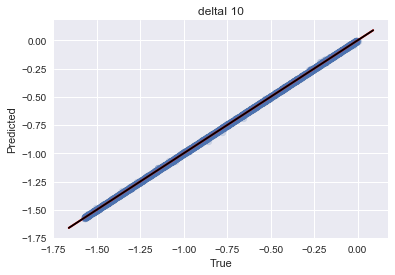

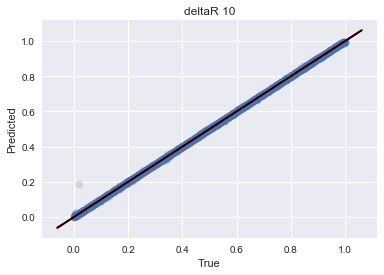

In [22]:
#Trying Independent Random Forest

rs = 42
md = 30
n = 30

regr_RF2_dr_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)

model_RF2_dr_sp = regr_RF2_dr_sp.fit(X1_train, Y1_train['deltaR'])
model_RF2_di_sp = regr_RF2_di_sp.fit(X1_train, Y1_train['deltaI'])

predictions_RF2_dr_sp = model_RF2_dr_sp.predict(X1_test)
predictions_RF2_di_sp = model_RF2_di_sp.predict(X1_test)


#importance_RF_10 = pd.Series(model_RF2.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF2_dr_sp.score(X1_test, Y1_test['deltaR']), 'for delta I/R 10')

plotSummary(Y1_test['deltaR'], predictions_RF2_dr_sp, 'deltaI 10')
plotSummary(Y1_test['deltaI'], predictions_RF2_di_sp, 'deltaR 10')


In [23]:
# spec info independent random forest feature importances delta R  
FI_sp_RF2_dr = pd.DataFrame(model_RF2_dr_sp.feature_importances_.T, columns = ['Spec - RF2_dr'])
FI_sp_RF2_dr.index = X1_train.columns

# print(FI_sp_RF2_dr[FI_sp_RF2_dr['Spec - RF2_dr']>0.001])
features_sp_RF2_dr = (FI_sp_RF2_dr[FI_sp_RF2_dr['Spec - RF2_dr']>0.006])
features_sp_RF2_dr_sorted = features_sp_RF2_dr.sort_values('Spec - RF2_dr', ascending = False)

# spec info independent random forest feature importances delta I  
FI_sp_RF2_di = pd.DataFrame(model_RF2_di_sp.feature_importances_.T, columns = ['Spec - RF2_di'])
FI_sp_RF2_di.index = X1_train.columns

# print(FI_sp_RF2_di[FI_sp_RF2_di['Spec - RF2_di']>0.001])
features_sp_RF2_di = (FI_sp_RF2_di[FI_sp_RF2_di['Spec - RF2_di']>0.006])
features_sp_RF2_di_sorted = features_sp_RF2_di.sort_values('Spec - RF2_di', ascending = False)

### peak info


Score - Random Forest: 0.9989601762930792 for delta I/R 10
 
RMSE on test data: 0.014611487487215491 for  deltaI 10
R^2 Score on test data: 0.9989601762930792 for deltaI 10
 
RMSE on test data: 0.012261375447749075 for  deltaR 10
R^2 Score on test data: 0.9982118230560911 for deltaR 10


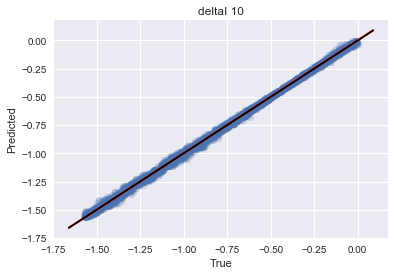

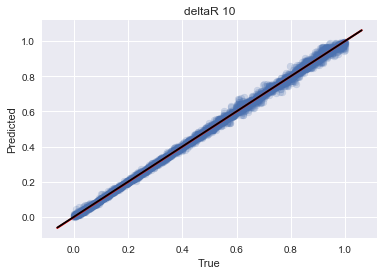

In [24]:
#Trying Independent Random Forest

rs = 42
md = 30
n = 30

regr_RF2_dr_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)

model_RF2_dr_pi = regr_RF2_dr_pi.fit(X2_train, Y2_train['deltaR'])
model_RF2_di_pi = regr_RF2_di_pi.fit(X2_train, Y2_train['deltaI'])

predictions_RF2_dr_pi = model_RF2_dr_pi.predict(X2_test)
predictions_RF2_di_pi = model_RF2_di_pi.predict(X2_test)


#importance_RF_10 = pd.Series(model_RF2.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF2_dr_pi.score(X2_test, Y2_test['deltaR']), 'for delta I/R 10')

plotSummary(Y2_test['deltaR'], predictions_RF2_dr_pi, 'deltaI 10')
plotSummary(Y2_test['deltaI'], predictions_RF2_di_pi, 'deltaR 10')

In [25]:
# peak info independent random forest feature importances delta R  
FI_pi_RF2_dr = pd.DataFrame(model_RF2_dr_pi.feature_importances_.T, columns = ['Peak - RF2_dr'])
FI_pi_RF2_dr.index = X2_train.columns

# print(FI_pi_RF2_dr[FI_pi_RF2_dr['Peak - RF2_dr']>0.001])
features_pi_RF2_dr = (FI_pi_RF2_dr[FI_pi_RF2_dr['Peak - RF2_dr']>0.006])
features_pi_RF2_dr_sorted = features_pi_RF2_dr.sort_values('Peak - RF2_dr', ascending = False)


# peak info independent random forest feature importances delta I 
FI_pi_RF2_di = pd.DataFrame(model_RF2_di_pi.feature_importances_.T, columns = ['Peak - RF2_di'])
FI_pi_RF2_di.index = X2_train.columns

# print(FI_pi_RF2_di[FI_pi_RF2_di['Peak - RF2_di']>0.001])
features_pi_RF2_di = (FI_pi_RF2_di[FI_pi_RF2_di['Peak - RF2_di']>0.006])
features_pi_RF2_di_sorted = features_pi_RF2_di.sort_values('Peak - RF2_di', ascending = False)



### spec points and peak info


Score - Random Forest: 0.9999785654005034 for delta I/R 10
 
RMSE on test data: 0.002097839506246645 for  deltaI 10
R^2 Score on test data: 0.9999785654005034 for deltaI 10
 
RMSE on test data: 0.00341228485085887 for  deltaR 10
R^2 Score on test data: 0.9998615086447231 for deltaR 10


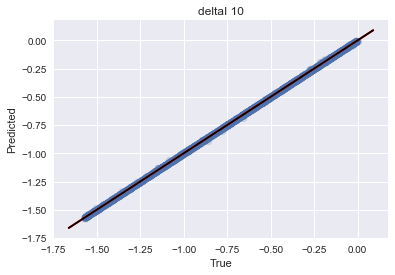

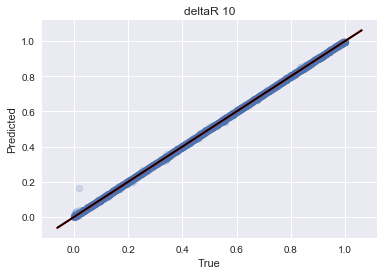

In [26]:
#Trying Independent Random Forest

rs = 42
md = 30
n = 30

regr_RF2_dr_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)

model_RF2_dr_both = regr_RF2_dr_both.fit(X_train, Y_train['deltaR'])
model_RF2_di_both = regr_RF2_di_both.fit(X_train, Y_train['deltaI'])

predictions_RF2_dr_both = model_RF2_dr_both.predict(X_test)
predictions_RF2_di_both = model_RF2_di_both.predict(X_test)


#importance_RF_10 = pd.Series(model_RF2.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF2_dr_both.score(X_test, Y_test['deltaR']), 'for delta I/R 10')

plotSummary(Y_test['deltaR'], predictions_RF2_dr_both, 'deltaI 10')
plotSummary(Y_test['deltaI'], predictions_RF2_di_both, 'deltaR 10')

In [27]:
# combined info independent random forest feature importances delta R  
FI_b_RF2_dr = pd.DataFrame(model_RF2_dr_both.feature_importances_.T, columns = ['Both - RF2_dr'])
FI_b_RF2_dr.index = X_train.columns

# print(FI_b_RF2_dr[FI_b_RF2_dr['Both - RF2_dr']>0.001])
features_b_RF2_dr = (FI_b_RF2_dr[FI_b_RF2_dr['Both - RF2_dr']>0.006])
features_b_RF2_dr_sorted = features_b_RF2_dr.sort_values('Both - RF2_dr', ascending = False)


# combined info independent random forest feature importances delta I  
FI_b_RF2_di = pd.DataFrame(model_RF2_di_both.feature_importances_.T, columns = ['Both - RF2_di'])
FI_b_RF2_di.index = X_train.columns

# print(FI_b_RF2_di[FI_b_RF2_di['Both - RF2_di']>0.001])
features_b_RF2_di = (FI_b_RF2_di[FI_b_RF2_di['Both - RF2_di']>0.006])
features_b_RF2_di_sorted = features_b_RF2_di.sort_values('Both - RF2_di', ascending = False)

In [28]:

display_side_by_side(features_sp_RF2_dr_sorted, features_sp_RF2_di_sorted, features_b_RF2_dr_sorted, features_b_RF2_di_sorted)
display_side_by_side(features_pi_RF2_dr_sorted, features_pi_RF2_di_sorted)

,Spec - RF2_dr
E_492_mV,0.748230
E_354_mV,0.098781
E_12_mV,0.044390
E_14_mV,0.027055
E_-218_mV,0.012416
E_360_mV,0.011904
E_-180_mV,0.011542
E_-6_mV,0.009267
E_232_mV,0.008196
,Spec - RF2_di


,Peak - RF2_dr
peak4,0.370094
prom4,0.284666
loc3,0.215983
width4,0.051743
loc2,0.032825
loc4,0.025982
width2,0.008799
width3,0.006663
,Peak - RF2_di
width2,0.529540


## AdaBoost Random Forest

### spec points

 
RMSE on test data: 0.0028923234152006647 for  AdaBoost Delta I
R^2 Score on test data: 0.9999004993732992 for AdaBoost Delta I
 
RMSE on test data: 0.002168964934673007 for  AdaBoost Delta R
R^2 Score on test data: 0.9999770873186419 for AdaBoost Delta R
Delta I AdaBoost Score: 0.9999004993732992
Delta R AdaBoost Score: 0.9999770873186419


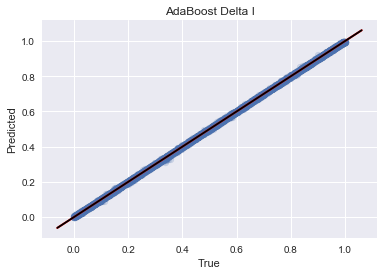

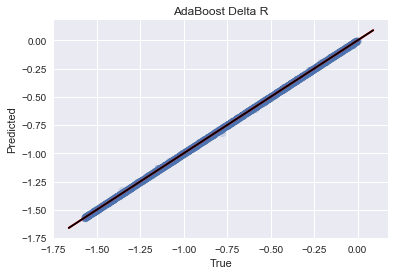

In [29]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)

model_AB_di_sp = regr_AB_di_sp.fit(X1_train, Y1_train['deltaI'])
model_AB_dr_sp = regr_AB_dr_sp.fit(X1_train, Y1_train['deltaR'])

predictions_AB_di_sp = model_AB_di_sp.predict(X1_test)
predictions_AB_dr_sp = model_AB_dr_sp.predict(X1_test)


plotSummary(Y1_test['deltaI'], predictions_AB_di_sp, 'AdaBoost Delta I')
plotSummary(Y1_test['deltaR'], predictions_AB_dr_sp, 'AdaBoost Delta R')

print('Delta I AdaBoost Score:', model_AB_di_sp.score(X1_test, Y1_test['deltaI']))
print('Delta R AdaBoost Score:', model_AB_dr_sp.score(X1_test, Y1_test['deltaR']))


In [30]:
# spec info adaboost random forest feature importances delta R  
FI_sp_AB_dr = pd.DataFrame(model_AB_dr_sp.feature_importances_.T, columns = ['Spec - AB_dr'])
FI_sp_AB_dr.index = X1_train.columns

# print(FI_sp_AB_dr[FI_sp_AB_dr['Spec - AB_dr']>0.001])
features_sp_AB_dr = (FI_sp_AB_dr[FI_sp_AB_dr['Spec - AB_dr']>0.006])
features_sp_AB_dr_sorted = features_sp_AB_dr.sort_values('Spec - AB_dr', ascending = False)

# spec info adaboost random forest feature importances delta I  
FI_sp_AB_di = pd.DataFrame(model_AB_di_sp.feature_importances_.T, columns = ['Spec - AB_di'])
FI_sp_AB_di.index = X1_train.columns

# print(FI_sp_AB_di[FI_sp_AB_di['Spec - AB_di']>0.001])
features_sp_AB_di = (FI_sp_AB_di[FI_sp_AB_di['Spec - AB_di']>0.006])
features_sp_AB_di_sorted = features_sp_AB_di.sort_values('Spec - AB_di', ascending = False)

### peak info

 
RMSE on test data: 0.012680799610988253 for  AdaBoost Delta I
R^2 Score on test data: 0.9980873945522825 for AdaBoost Delta I
 
RMSE on test data: 0.015134430033923002 for  AdaBoost Delta R
R^2 Score on test data: 0.9988844141587867 for AdaBoost Delta R


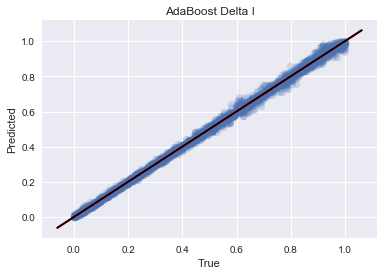

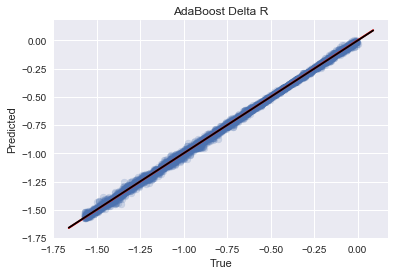

In [31]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)

model_AB_di_pi = regr_AB_di_pi.fit(X2_train, Y2_train['deltaI'])
model_AB_dr_pi = regr_AB_dr_pi.fit(X2_train, Y2_train['deltaR'])

predictions_AB_di_pi = model_AB_di_pi.predict(X2_test)
predictions_AB_dr_pi = model_AB_dr_pi.predict(X2_test)

plotSummary(Y2_test['deltaI'], predictions_AB_di_pi, 'AdaBoost Delta I')
plotSummary(Y2_test['deltaR'], predictions_AB_dr_pi, 'AdaBoost Delta R')


In [32]:
# peak info adaboost random forest feature importances delta R  
FI_pi_AB_dr = pd.DataFrame(model_AB_dr_pi.feature_importances_.T, columns = ['Peak - AB_dr'])
FI_pi_AB_dr.index = X2_train.columns

# print(FI_pi_AB_dr[FI_pi_AB_dr['Peak - AB_dr']>0.001])
features_pi_AB_dr = (FI_pi_AB_dr[FI_pi_AB_dr['Peak - AB_dr']>0.006])
features_pi_AB_dr_sorted = features_pi_AB_dr.sort_values('Peak - AB_dr', ascending = False)


# peak info adaboost random forest feature importances delta I 
FI_pi_AB_di = pd.DataFrame(model_AB_di_pi.feature_importances_.T, columns = ['Peak - AB_di'])
FI_pi_AB_di.index = X2_train.columns

# print(FI_pi_AB_di[FI_pi_AB_di['Peak - AB_di']>0.001])
features_pi_AB_di = (FI_pi_AB_di[FI_pi_AB_di['Peak - AB_di']>0.006])
features_pi_AB_di_sorted = features_pi_AB_di.sort_values('Peak - AB_di', ascending = False)


### spec points and peak info

 
RMSE on test data: 0.002690782587309876 for  AdaBoost Delta I
R^2 Score on test data: 0.9999138829139066 for AdaBoost Delta I
 
RMSE on test data: 0.002059086272445866 for  AdaBoost Delta R
R^2 Score on test data: 0.9999793500055054 for AdaBoost Delta R


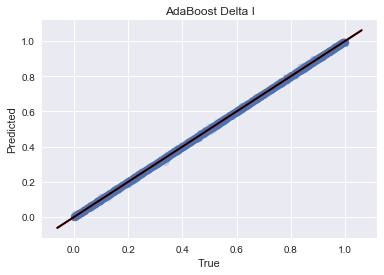

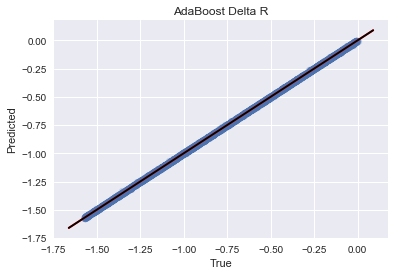

In [33]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)

model_AB_di_both = regr_AB_di_both.fit(X_train, Y_train['deltaI'])
model_AB_dr_both = regr_AB_dr_both.fit(X_train, Y_train['deltaR'])

predictions_AB_di_both = model_AB_di_both.predict(X_test)
predictions_AB_dr_both = model_AB_dr_both.predict(X_test)

plotSummary(Y_test['deltaI'], predictions_AB_di_both, 'AdaBoost Delta I')
plotSummary(Y_test['deltaR'], predictions_AB_dr_both, 'AdaBoost Delta R')


In [34]:
# combined info adaboost random forest feature importances delta R  
FI_b_AB_dr = pd.DataFrame(model_AB_dr_both.feature_importances_.T, columns = ['Both - AB_dr'])
FI_b_AB_dr.index = X_train.columns

# print(FI_b_AB_dr[FI_b_AB_dr['Both - AB_dr']>0.001])
features_b_AB_dr = (FI_b_AB_dr[FI_b_AB_dr['Both - AB_dr']>0.006])
features_b_AB_dr_sorted = features_b_AB_dr.sort_values('Both - AB_dr', ascending = False)


# combined info adaboost random forest feature importances delta I  
FI_b_AB_di = pd.DataFrame(model_AB_di_both.feature_importances_.T, columns = ['Both - AB_di'])
FI_b_AB_di.index = X_train.columns

# print(FI_b_AB_di[FI_b_AB_di['Both - AB_di']>0.001])
features_b_AB_di = (FI_b_AB_di[FI_b_AB_di['Both - AB_di']>0.006])
features_b_AB_di_sorted = features_b_AB_di.sort_values('Both - AB_di', ascending = False)

In [36]:
display_side_by_side(features_sp_AB_dr_sorted, features_sp_AB_di_sorted, features_b_AB_dr_sorted, features_b_AB_di_sorted)
display_side_by_side(features_pi_AB_dr_sorted, features_pi_AB_di_sorted)

,Spec - AB_dr
E_492_mV,0.679204
E_354_mV,0.091303
E_12_mV,0.045265
E_-220_mV,0.036052
E_14_mV,0.031040
E_-216_mV,0.017434
E_360_mV,0.012144
E_-6_mV,0.009250
E_-36_mV,0.009130
E_-176_mV,0.008335


,Peak - AB_dr
peak4,0.403710
prom4,0.241930
loc3,0.155988
loc4,0.133045
width4,0.038930
loc2,0.011168
width2,0.008030
,Peak - AB_di
width2,0.520321
loc2,0.333683


## Gradient Boosting Random Forest

### spec points

 
RMSE on test data: 0.013393535937263073 for  GradientBoost Delta I
R^2 Score on test data: 0.9978663528311753 for GradientBoost Delta I
 
RMSE on test data: 0.019331878347100664 for  GradientBoost Delta R
R^2 Score on test data: 0.9981798006256749 for GradientBoost Delta R


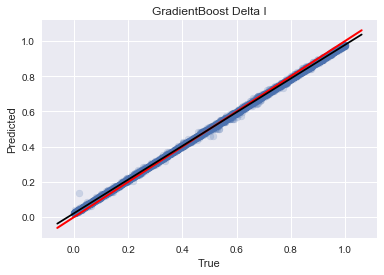

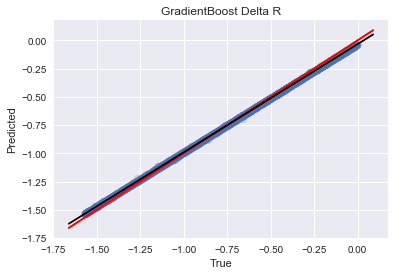

In [37]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30

regr_GB_di_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)

model_GB_di_sp = regr_GB_di_sp.fit(X1_train, Y1_train['deltaI'])
model_GB_dr_sp = regr_GB_dr_sp.fit(X1_train, Y1_train['deltaR'])

predictions_GB_di_sp = model_GB_di_sp.predict(X1_test)
predictions_GB_dr_sp = model_GB_dr_sp.predict(X1_test)

plotSummary(Y1_test['deltaI'], predictions_GB_di_sp, 'GradientBoost Delta I')
plotSummary(Y1_test['deltaR'], predictions_GB_dr_sp, 'GradientBoost Delta R')


In [38]:
# spec info gradientboost random forest feature importances delta R  
FI_sp_GB_dr = pd.DataFrame(model_GB_dr_sp.feature_importances_.T, columns = ['Spec - GB_dr'])
FI_sp_GB_dr.index = X1_train.columns

# print(FI_sp_GB_dr[FI_sp_GB_dr['Spec - GB_dr']>0.001])
features_sp_GB_dr = (FI_sp_GB_dr[FI_sp_GB_dr['Spec - GB_dr']>0.006])
features_sp_GB_dr_sorted = features_sp_GB_dr.sort_values('Spec - GB_dr', ascending = False)

# spec info gradientboost random forest feature importances delta I  
FI_sp_GB_di = pd.DataFrame(model_GB_di_sp.feature_importances_.T, columns = ['Spec - GB_di'])
FI_sp_GB_di.index = X1_train.columns

# print(FI_sp_GB_di[FI_sp_GB_di['Spec - GB_di']>0.001])
features_sp_GB_di = (FI_sp_GB_di[FI_sp_GB_di['Spec - GB_di']>0.006])
features_sp_GB_di_sorted = features_sp_GB_di.sort_values('Spec - GB_di', ascending = False)

### peak info

 
RMSE on test data: 0.018438172314411874 for  GradientBoost Delta I
R^2 Score on test data: 0.9959564031653084 for GradientBoost Delta I
 
RMSE on test data: 0.025526451518362355 for  GradientBoost Delta R
R^2 Score on test data: 0.996826403215267 for GradientBoost Delta R


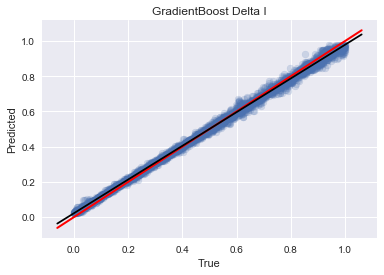

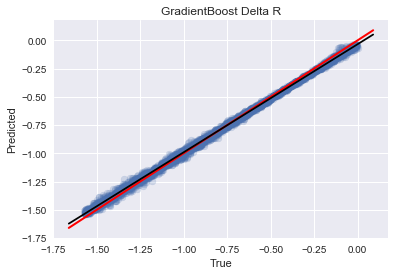

In [39]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30

regr_GB_di_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)

model_GB_di_pi = regr_GB_di_pi.fit(X2_train, Y2_train['deltaI'])

model_GB_dr_pi = regr_GB_dr_pi.fit(X2_train, Y2_train['deltaR'])

predictions_GB_di_pi = model_GB_di_pi.predict(X2_test)
predictions_GB_dr_pi = model_GB_dr_pi.predict(X2_test)

plotSummary(Y2_test['deltaI'], predictions_GB_di_pi, 'GradientBoost Delta I')
plotSummary(Y2_test['deltaR'], predictions_GB_dr_pi, 'GradientBoost Delta R')


In [40]:
# peak info gradient boost random forest feature importances delta R  
FI_pi_GB_dr = pd.DataFrame(model_GB_dr_pi.feature_importances_.T, columns = ['Peak - GB_dr'])
FI_pi_GB_dr.index = X2_train.columns

# print(FI_pi_GB_dr[FI_pi_AB_dr['Peak - GB_dr']>0.001])
features_pi_GB_dr = (FI_pi_GB_dr[FI_pi_GB_dr['Peak - GB_dr']>0.006])
features_pi_GB_dr_sorted = features_pi_GB_dr.sort_values('Peak - GB_dr', ascending = False)


# peak info gradientboost random forest feature importances delta I 
FI_pi_GB_di = pd.DataFrame(model_GB_di_pi.feature_importances_.T, columns = ['Peak - GB_di'])
FI_pi_GB_di.index = X2_train.columns

# print(FI_pi_GB_di[FI_pi_GB_di['Peak - GB_di']>0.001])
features_pi_GB_di = (FI_pi_GB_di[FI_pi_GB_di['Peak - GB_di']>0.006])
features_pi_GB_di_sorted = features_pi_GB_di.sort_values('Peak - GB_di', ascending = False)


### spec points and peak info

 
RMSE on test data: 0.013240903612353269 for  GradientBoost Delta I
R^2 Score on test data: 0.997914705693876 for GradientBoost Delta I
 
RMSE on test data: 0.019350476672209797 for  GradientBoost Delta R
R^2 Score on test data: 0.9981762966781356 for GradientBoost Delta R


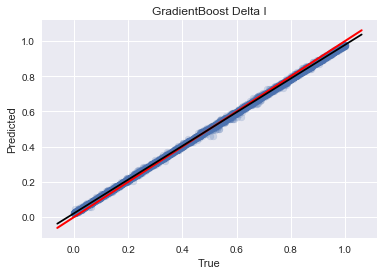

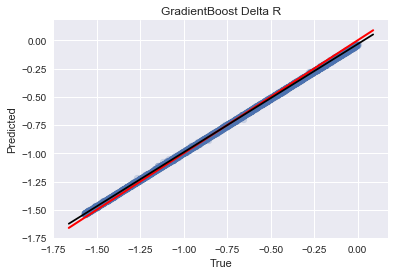

In [42]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30

regr_GB_di_both = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_both = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)

model_GB_di_both = regr_GB_di_both.fit(X_train, Y_train['deltaI'])

model_GB_dr_both = regr_GB_dr_both.fit(X_train, Y_train['deltaR'])

predictions_GB_di_both = model_GB_di_both.predict(X_test)
predictions_GB_dr_both = model_GB_dr_both.predict(X_test)

plotSummary(Y_test['deltaI'], predictions_GB_di_both, 'GradientBoost Delta I')
plotSummary(Y_test['deltaR'], predictions_GB_dr_both, 'GradientBoost Delta R')



In [43]:
# combined info gradient boost random forest feature importances delta R  
FI_b_GB_dr = pd.DataFrame(model_GB_dr_both.feature_importances_.T, columns = ['Both - GB_dr'])
FI_b_GB_dr.index = X_train.columns

# print(FI_b_GB_dr[FI_b_GB_dr['Both - GB_dr']>0.001])
features_b_GB_dr = (FI_b_GB_dr[FI_b_GB_dr['Both - GB_dr']>0.006])
features_b_GB_dr_sorted = features_b_GB_dr.sort_values('Both - GB_dr', ascending = False)


# combined info gradient boost random forest feature importances delta I  
FI_b_GB_di = pd.DataFrame(model_GB_di_both.feature_importances_.T, columns = ['Both - GB_di'])
FI_b_GB_di.index = X_train.columns

# print(FI_b_GB_di[FI_b_GB_di['Both - GB_di']>0.001])
features_b_GB_di = (FI_b_GB_di[FI_b_GB_di['Both - GB_di']>0.006])
features_b_GB_di_sorted = features_b_GB_di.sort_values('Both - GB_di', ascending = False)

In [44]:
display_side_by_side(features_sp_GB_dr_sorted, features_sp_GB_di_sorted, features_b_GB_dr_sorted, features_b_GB_di_sorted)
display_side_by_side(features_pi_GB_dr_sorted, features_pi_GB_di_sorted)

,Spec - GB_dr
E_492_mV,0.747762
E_354_mV,0.098333
E_12_mV,0.083532
E_-218_mV,0.012260
E_360_mV,0.011967
E_-6_mV,0.011507
E_232_mV,0.011464
,Spec - GB_di
E_-204_mV,0.567808
E_358_mV,0.164024


,Peak - GB_dr
peak4,0.648740
loc3,0.203988
width4,0.052062
loc2,0.041908
loc4,0.028569
width2,0.009256
width3,0.007477
,Peak - GB_di
width2,0.500823
loc2,0.372835


In [45]:
display_side_by_side(features_sp_RF_sorted, features_sp_DT_sorted, features_sp_GB_dr_sorted,features_sp_AB_dr_sorted,features_sp_RF2_dr_sorted)

,Spec - RF
E_492_mV,0.533000
E_436_mV,0.086057
E_-298_mV,0.037346
E_-300_mV,0.030368
E_354_mV,0.023052
E_10_mV,0.021378
E_-294_mV,0.018835
E_76_mV,0.018779
E_438_mV,0.015115
E_12_mV,0.009888


In [46]:
display_side_by_side(features_sp_RF_sorted, features_sp_DT_sorted, features_sp_GB_di_sorted,features_sp_AB_di_sorted,features_sp_RF2_di_sorted)

,Spec - RF
E_492_mV,0.533000
E_436_mV,0.086057
E_-298_mV,0.037346
E_-300_mV,0.030368
E_354_mV,0.023052
E_10_mV,0.021378
E_-294_mV,0.018835
E_76_mV,0.018779
E_438_mV,0.015115
E_12_mV,0.009888


In [47]:
display_side_by_side(features_pi_RF_sorted, features_pi_DT_sorted, features_pi_GB_dr_sorted,features_pi_AB_dr_sorted,features_pi_RF2_dr_sorted)

,Peak - RF
prom4,0.496228
loc4,0.173653
loc2,0.095497
peak4,0.084955
loc3,0.051227
width3,0.019340
peak2,0.018394
prom2,0.018019
width4,0.017542
prom3,0.010180


In [48]:
display_side_by_side(features_pi_RF_sorted, features_pi_DT_sorted, features_pi_GB_di_sorted,features_pi_AB_di_sorted,features_pi_RF2_di_sorted)

,Peak - RF
prom4,0.496228
loc4,0.173653
loc2,0.095497
peak4,0.084955
loc3,0.051227
width3,0.019340
peak2,0.018394
prom2,0.018019
width4,0.017542
prom3,0.010180


In [49]:
display_side_by_side(features_b_RF_sorted, features_b_DT_sorted, features_b_GB_dr_sorted,features_b_AB_dr_sorted,features_b_RF2_dr_sorted)

,Both - RF
E_492_mV,0.533022
E_436_mV,0.086097
E_-298_mV,0.037391
E_-300_mV,0.030366
E_354_mV,0.023019
E_10_mV,0.022380
E_-294_mV,0.018838
E_76_mV,0.017584
E_438_mV,0.014938
E_-124_mV,0.008604


In [50]:
display_side_by_side(features_b_RF_sorted, features_b_DT_sorted, features_b_GB_di_sorted,features_b_AB_di_sorted,features_b_RF2_di_sorted)

,Both - RF
E_492_mV,0.533022
E_436_mV,0.086097
E_-298_mV,0.037391
E_-300_mV,0.030366
E_354_mV,0.023019
E_10_mV,0.022380
E_-294_mV,0.018838
E_76_mV,0.017584
E_438_mV,0.014938
E_-124_mV,0.008604


## Testing the Models on the Experimental Data



In [51]:
# Load the experimental data
col_names3 = peak_names + locs_names + width_names + prom_names
col_names4 = energy_names

col_names_exp_both = col_names_both[2:]

exp_data_sp = pd.read_csv('Training_Data/Hexagon/HexagonExperimentalData062218_v8_specPoints.csv', header = None, names = col_names4)
exp_data_pi = pd.read_csv('Training_Data/Hexagon/HexagonExperimentalData062218_v8_peakinfo.csv', header = None, names = col_names3)

In [52]:
energy_names = ['E_%i_mV' % item for item in list(energy.T[0])]
col_names1a = energy_names[50:]
exp_data_sp = exp_data_sp[col_names1a]
exp_data_sp

,E_-300_mV,E_-298_mV,E_-296_mV,E_-294_mV,E_-292_mV,E_-290_mV,E_-288_mV,E_-286_mV,E_-284_mV,E_-282_mV,...,E_482_mV,E_484_mV,E_486_mV,E_488_mV,E_490_mV,E_492_mV,E_494_mV,E_496_mV,E_498_mV,E_500_mV
0,0.63866,0.64322,0.6455,0.6487,0.65752,0.66493,0.67365,0.68098,0.69691,0.70971,...,1.0453,1.0284,0.99538,0.98221,0.97146,0.97284,0.98729,0.98385,0.98191,0.97779


In [54]:
peak_names2 = ['peak2', 'peak3', 'peak4']
prom_names2 = ['prom2', 'prom3', 'prom4']
locs_names2 = ['loc2', 'loc3', 'loc4']
width_names2 = ['width2', 'width3', 'width4']
pi_names = peak_names2 + locs_names2 + width_names2 + prom_names2
exp_data_pi = exp_data_pi[pi_names]
exp_data_pi

,peak2,peak3,peak4,loc2,loc3,loc4,width2,width3,width4,prom2,prom3,prom4
0,1.9262,1.8662,1.4495,-0.242,-0.074,0.134,0.032045,0.039422,0.04612,1.2902,1.1855,0.57098


In [55]:
#subset = 5 
energy_names2 = energy_names[50:]
exp_data_sp2 = exp_data_sp[energy_names2]
exp_data_both = exp_data_pi.join(exp_data_sp2, how = 'left')
exp_data_both


,peak2,peak3,peak4,loc2,loc3,loc4,width2,width3,width4,prom2,...,E_482_mV,E_484_mV,E_486_mV,E_488_mV,E_490_mV,E_492_mV,E_494_mV,E_496_mV,E_498_mV,E_500_mV
0,1.9262,1.8662,1.4495,-0.242,-0.074,0.134,0.032045,0.039422,0.04612,1.2902,...,1.0453,1.0284,0.99538,0.98221,0.97146,0.97284,0.98729,0.98385,0.98191,0.97779


In [56]:
pred_phase_OLS_R_sp = results_OLS_R_sp.predict(exp_data_sp)
pred_phase_OLS_I_sp = results_OLS_I_sp.predict(exp_data_sp)

pred_phase_OLS_R_pi = results_OLS_R_pi.predict(exp_data_pi)
pred_phase_OLS_I_pi = results_OLS_I_pi.predict(exp_data_pi)

pred_phase_OLS_R_both = results_OLS_R_both.predict(exp_data_both)
pred_phase_OLS_I_both = results_OLS_I_both.predict(exp_data_both)

pred_phase_DT_sp = np.append(regr_DT_sp.predict(exp_data_sp),
                             r2_score(Y1_test['deltaI'], predictions_DT_sp[:,0])).reshape(3,1).T
pred_phase_DT_sp = np.append(pred_phase_DT_sp, 
                             r2_score(Y1_test['deltaR'], predictions_DT_sp[:,1])).reshape(4,1).T

pred_phase_DT_pi = np.append(regr_DT_pi.predict(exp_data_pi), 
                            r2_score(Y1_test['deltaI'], predictions_DT_pi[:,0])).reshape(3,1).T
pred_phase_DT_pi = np.append(pred_phase_DT_pi, 
                            r2_score(Y1_test['deltaR'], predictions_DT_pi[:,1])).reshape(4,1).T
#pred_phase_DT = np.append(pred_phase_DT, r2_score(Y_test['scale_factor'], y_pred_DT[:,2]))

pred_phase_DT_both = np.append(regr_DT_both.predict(exp_data_both), 
                            r2_score(Y_test['deltaI'], predictions_DT_both[:,0])).reshape(3,1).T
pred_phase_DT_both = np.append(pred_phase_DT_both, 
                            r2_score(Y_test['deltaR'], predictions_DT_both[:,1])).reshape(4,1).T

pred_phase_RF_sp = regr_RF_sp.predict(exp_data_sp)
pred_phase_RF_pi = regr_RF_pi.predict(exp_data_pi)
pred_phase_RF_both = regr_RF_both.predict(exp_data_both)

pred_phase_AB_R_sp = model_AB_dr_sp.predict(exp_data_sp)
pred_phase_AB_I_sp = model_AB_di_sp.predict(exp_data_sp)

pred_phase_AB_R_pi = model_AB_dr_pi.predict(exp_data_pi)
pred_phase_AB_I_pi = model_AB_di_pi.predict(exp_data_pi)

pred_phase_AB_R_both = model_AB_dr_both.predict(exp_data_both)
pred_phase_AB_I_both = model_AB_di_both.predict(exp_data_both)

pred_phase_GB_di_sp = model_GB_di_sp.predict(exp_data_sp)
pred_phase_GB_dr_sp = model_GB_dr_sp.predict(exp_data_sp)

pred_phase_GB_di_pi = model_GB_di_pi.predict(exp_data_pi)
pred_phase_GB_dr_pi = model_GB_dr_pi.predict(exp_data_pi)

pred_phase_GB_di_both = model_GB_di_both.predict(exp_data_both)
pred_phase_GB_dr_both = model_GB_dr_both.predict(exp_data_both)

pred_phase_IRF_di_sp = model_RF2_di_sp.predict(exp_data_sp)
pred_phase_IRF_dr_sp = model_RF2_dr_sp.predict(exp_data_sp)

pred_phase_IRF_di_pi = model_RF2_di_pi.predict(exp_data_pi)
pred_phase_IRF_dr_pi = model_RF2_dr_pi.predict(exp_data_pi)

pred_phase_IRF_di_both = model_RF2_di_both.predict(exp_data_both)
pred_phase_IRF_dr_both = model_RF2_dr_both.predict(exp_data_both)

predictedPhases = pd.DataFrame(pred_phase_DT_sp, columns = ['deltaI', 'deltaR', 'deltaI score', 'deltaR score'], index = ['Decision Tree spec points'])

new_test = pd.Series(pred_phase_DT_pi[0], index = ['deltaI', 'deltaR', 'deltaI score', 'deltaR score'], name = 'Decision Tree Peak Info')
predictedPhases = predictedPhases.append(new_test)

new_1 = pd.Series(pred_phase_DT_both[0], index = ['deltaI', 'deltaR', 'deltaI score', 'deltaR score'], name = 'Decision Tree Spec Points and peak info')
predictedPhases = predictedPhases.append(new_1)

predictedPhases.loc['OLS spec points'] = (pred_phase_OLS_I_sp[0], pred_phase_OLS_R_sp[0], r2_score(Y1_test['deltaI'],predictions_OLS_I_sp ), r2_score(Y1_test['deltaR'],predictions_OLS_R_sp ))
predictedPhases.loc['OLS peak info'] = (pred_phase_OLS_I_pi[0], pred_phase_OLS_R_pi[0], r2_score(Y2_test['deltaI'], predictions_OLS_I_pi), r2_score(Y2_test['deltaR'], predictions_OLS_R_pi))
predictedPhases.loc['OLS spec points and peak info'] = (pred_phase_OLS_I_both[0], pred_phase_OLS_R_both[0], r2_score(Y_test['deltaI'], predictions_OLS_I_both), r2_score(Y_test['deltaR'], predictions_OLS_R_both))

predictedPhases.loc['Random Forest spec points'] = (pred_phase_RF_sp[0,0], pred_phase_RF_sp[0,1], r2_score(Y1_test['deltaI'], predictions_RF_sp[:,0]), r2_score(Y1_test['deltaR'], predictions_RF_sp[:,1]))
predictedPhases.loc['Random Forest peak info'] = (pred_phase_RF_pi[0,0], pred_phase_RF_pi[0,1], r2_score(Y2_test['deltaI'], predictions_RF_pi[:,0]), r2_score(Y2_test['deltaR'], predictions_RF_pi[:,1]))
predictedPhases.loc['Random Forest spec points and peak info'] = (pred_phase_RF_both[0,0], pred_phase_RF_both[0,1], r2_score(Y_test['deltaI'], predictions_RF_both[:,0]), r2_score(Y_test['deltaR'], predictions_RF_both[:,1]))


predictedPhases.loc['AdaBoost spec points'] = (pred_phase_AB_I_sp[0], pred_phase_AB_R_sp[0],r2_score(Y1_test['deltaI'], predictions_AB_di_sp), r2_score(Y1_test['deltaR'], predictions_AB_dr_sp))
predictedPhases.loc['AdaBoost peak info'] = (pred_phase_AB_I_pi[0], pred_phase_AB_R_pi[0],r2_score(Y2_test['deltaI'], predictions_AB_di_pi), r2_score(Y2_test['deltaR'], predictions_AB_dr_pi))
predictedPhases.loc['AdaBoost spec points and peak info'] = (pred_phase_AB_I_both[0], pred_phase_AB_R_both[0],r2_score(Y_test['deltaI'], predictions_AB_di_both), r2_score(Y_test['deltaR'], predictions_AB_dr_both))

predictedPhases.loc['Gradient Boosting spec Points'] = (pred_phase_GB_di_sp[0], pred_phase_GB_dr_sp[0],  r2_score(Y1_test['deltaI'], predictions_GB_di_sp), r2_score(Y1_test['deltaR'], predictions_GB_dr_sp))
predictedPhases.loc['Gradient Boosting peak info'] = (pred_phase_GB_di_pi[0], pred_phase_GB_dr_pi[0], r2_score(Y2_test['deltaI'], predictions_GB_di_pi), r2_score(Y2_test['deltaR'], predictions_GB_dr_pi))
predictedPhases.loc['Gradient Boosting spec points and peak info'] = (pred_phase_GB_di_both[0], pred_phase_GB_dr_both[0], r2_score(Y_test['deltaI'], predictions_GB_di_both), r2_score(Y_test['deltaR'], predictions_GB_dr_both))


predictedPhases.loc['Independent Random Forests spec Points'] = (pred_phase_IRF_di_sp[0], pred_phase_IRF_dr_sp[0],  r2_score(Y1_test['deltaI'], predictions_RF2_di_sp ), r2_score(Y1_test['deltaR'], predictions_RF2_dr_sp))
predictedPhases.loc['Independent Random Forests peak info'] = (pred_phase_IRF_di_pi[0], pred_phase_IRF_dr_pi[0], r2_score(Y2_test['deltaI'], predictions_RF2_di_pi), r2_score(Y2_test['deltaR'], predictions_RF2_dr_pi))
predictedPhases.loc['Independent Random Forests spec points and peak info'] = (pred_phase_IRF_di_both[0], pred_phase_IRF_dr_both[0], r2_score(Y_test['deltaI'], predictions_RF2_di_both), r2_score(Y_test['deltaR'], predictions_RF2_dr_both))


predictedPhases2 = predictedPhases.drop(['OLS spec points', 'OLS peak info', 'OLS spec points and peak info'], axis = 0)
predictedPhases2

,deltaI,deltaR,deltaI score,deltaR score
Decision Tree spec points,0.073290,-0.173843,0.998674,0.999375
Decision Tree Peak Info,0.115890,-0.179785,0.997250,0.998169
Decision Tree Spec Points and peak info,0.115890,-0.179785,0.998806,0.999403
Random Forest spec points,0.085811,-0.122858,0.999866,0.999933
Random Forest peak info,0.097934,-0.189262,0.998271,0.998965
Random Forest spec points and peak info,0.074390,-0.131027,0.999869,0.999934
AdaBoost spec points,0.058714,-0.192410,0.999900,0.999977
AdaBoost peak info,0.094902,-0.153830,0.998087,0.998884
AdaBoost spec points and peak info,0.063984,-0.192960,0.999914,0.999979
Gradient Boosting spec Points,0.082958,-0.221509,0.997866,0.998180


In [57]:
#Since this prediction has a score less than 0.99, we will exclude it. 
GoodPredictedPhases = predictedPhases.drop(['OLS spec points', 'OLS spec points and peak info', 'OLS peak info'], axis = 0)

deltaI_1 = (GoodPredictedPhases['deltaI']*GoodPredictedPhases['deltaI score']).mean()
deltaR_1 = (GoodPredictedPhases['deltaR']*GoodPredictedPhases['deltaR score']).mean()

print('The weighted average for the predicted phase is: ', deltaR_1, ' + ', deltaI_1, '*i')


The weighted average for the predicted phase is:  -0.17836391023004905  +  0.08455672807224936 *i


In [58]:
predictedPhases[['deltaI', 'deltaR']].to_csv('Model_Results/Hexagon/predictions_v9_JulyDispersion_deleteFirstPeak_threekinds.csv')
predictedPhases[['deltaI score', 'deltaR score']].to_csv('Model_Results/Hexagon/scores_v9_JulyDispersion_deleteFirstPeak_threekinds.csv')



In [59]:
predictedPhases

,deltaI,deltaR,deltaI score,deltaR score
Decision Tree spec points,0.073290,-0.173843,0.998674,0.999375
Decision Tree Peak Info,0.115890,-0.179785,0.997250,0.998169
Decision Tree Spec Points and peak info,0.115890,-0.179785,0.998806,0.999403
OLS spec points,-193.497466,379.696250,-1.721651,-0.257163
OLS peak info,-2.165997,7.268301,0.783200,0.766300
OLS spec points and peak info,-156.561778,388.182378,-31.466808,-1.489521
Random Forest spec points,0.085811,-0.122858,0.999866,0.999933
Random Forest peak info,0.097934,-0.189262,0.998271,0.998965
Random Forest spec points and peak info,0.074390,-0.131027,0.999869,0.999934
AdaBoost spec points,0.058714,-0.192410,0.999900,0.999977


In [60]:
importance_DT_ = pd.Series(regr_DT_both.feature_importances_, index = X_train.columns)
importance_RF_= pd.Series(model_RF_both.feature_importances_, index = X_train.columns)
importance_IRF_r = pd.Series(model_RF2_dr_both.feature_importances_, index = X_train.columns)
importance_IRF_i = pd.Series(model_RF2_di_both.feature_importances_, index = X_train.columns)
importance_ARF_r = pd.Series(model_AB_dr_both.feature_importances_, index = X_train.columns)
importance_ARF_i = pd.Series(model_AB_di_both.feature_importances_, index = X_train.columns)
importance_GRF_r = pd.Series(model_GB_dr_both.feature_importances_, index = X_train.columns)
importance_GRF_i = pd.Series(model_GB_di_both.feature_importances_, index = X_train.columns)

In [61]:
#tenFeatures = linspace(0,10, 10)
DT_FI_top = importance_DT_.nlargest(10)
RF_FI_top = importance_RF_.nlargest(10)
IRF_r_FI_top = importance_IRF_r.nlargest(10)
IRF_i_FI_top = importance_IRF_i.nlargest(10)
ARF_r_FI_top = importance_ARF_r.nlargest(10)
ARF_i_FI_top = importance_ARF_i.nlargest(10)
GRF_r_FI_top = importance_GRF_r.nlargest(10)
GRF_i_FI_top = importance_GRF_i.nlargest(10)
tops_list = [DT_FI_top, RF_FI_top, IRF_r_FI_top,IRF_i_FI_top, ARF_r_FI_top, ARF_i_FI_top, GRF_r_FI_top, GRF_i_FI_top ]
tops = pd.concat(tops_list)
#tops.plot(kind = 'pie')
tops_count = tops.groupby(level=[0]).size()
tops_count.sort_values(axis = 0)
tops_count = tops_count.sort_values()
tops_count

E_-44_mV     1
E_56_mV      1
E_438_mV     1
E_424_mV     1
E_328_mV     1
E_324_mV     1
E_16_mV      1
E_-54_mV     1
E_84_mV      1
E_-36_mV     1
E_-298_mV    1
E_-284_mV    1
E_-280_mV    1
E_96_mV      1
E_-178_mV    1
E_-188_mV    1
E_-208_mV    1
E_-196_mV    1
E_-202_mV    1
E_-220_mV    1
E_-200_mV    1
E_-218_mV    2
E_76_mV      2
E_-194_mV    2
E_326_mV     2
E_14_mV      2
E_232_mV     2
E_10_mV      2
E_-6_mV      2
E_-206_mV    2
E_-296_mV    2
E_-294_mV    2
E_-214_mV    2
E_-124_mV    2
E_-204_mV    3
E_-300_mV    3
E_358_mV     3
E_436_mV     3
E_-180_mV    3
E_12_mV      3
E_354_mV     5
E_360_mV     5
E_492_mV     5
dtype: int64

Text(0,0.5,'Feature Importance')

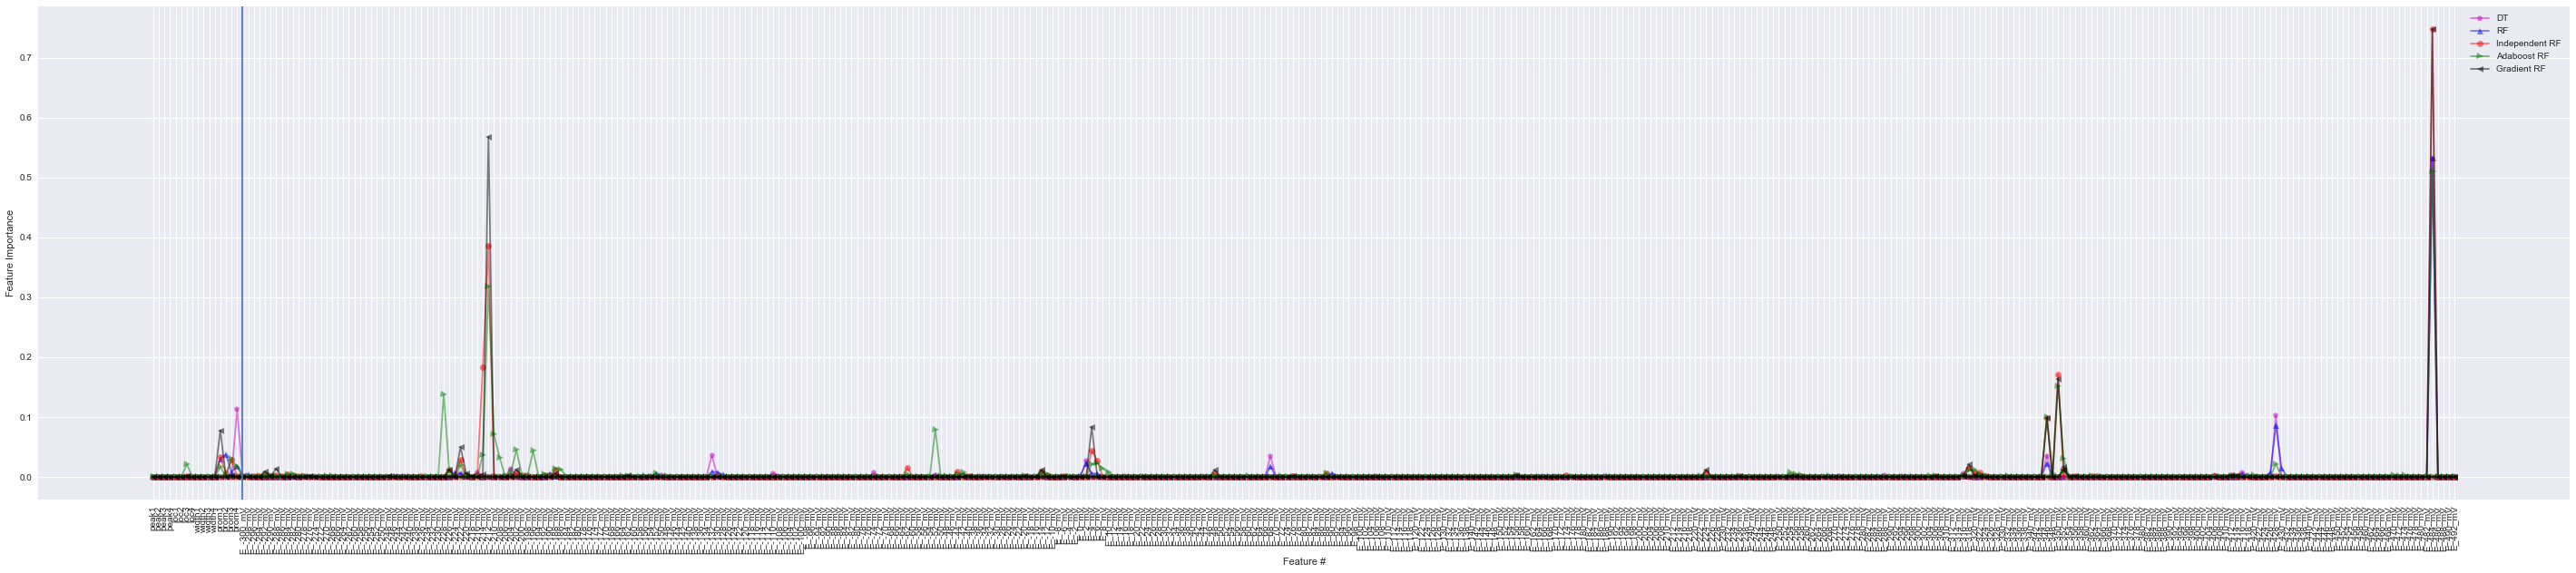

In [64]:
Features = linspace(0,413, 413)
figure(figsize=(50,10))
plt.plot(Features, importance_DT_, 'mp-', alpha = 0.5, label = "DT")
plt.plot(Features, importance_RF_, 'b^-', alpha = 0.5, label = "RF")
plt.plot(Features, importance_IRF_i,  'ro-', alpha = 0.5, label = "Independent RF")
plt.plot(Features, importance_IRF_r,  'ro-', alpha = 0.5)
plt.plot(Features, importance_ARF_i, 'g>-',alpha = 0.5, label = "Adaboost RF")
plt.plot(Features, importance_ARF_r, 'g>-',alpha = 0.5)
plt.plot(Features, importance_GRF_i, 'k<-', alpha = 0.5, label = "Gradient RF")
plt.plot(Features, importance_GRF_r, 'k<-', alpha = 0.5)
legend(loc = 'best')
plt.xticks(Features, col_names_exp_both, rotation = 'vertical')
matplotlib.pyplot.axvline(x=16, ymin=0, ymax=1)
xlabel('Feature #')
ylabel('Feature Importance')

(0, 100)

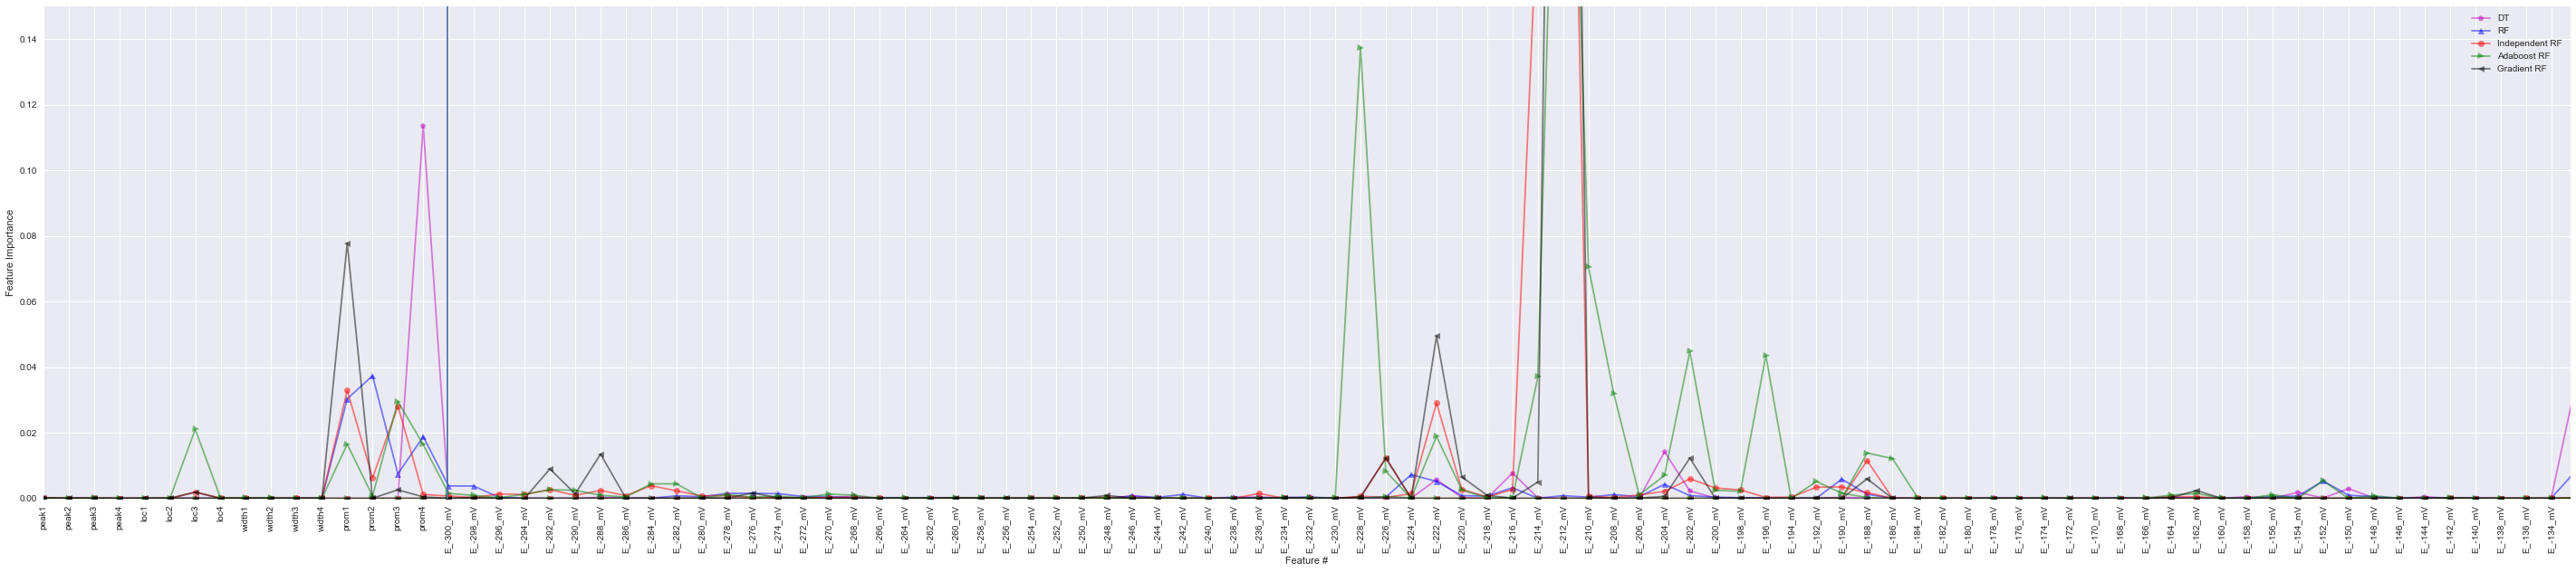

In [69]:
Features = linspace(0,413, 413)
figure(figsize=(50,10))
plt.plot(Features, importance_DT_, 'mp-', alpha = 0.5, label = "DT")
plt.plot(Features, importance_RF_, 'b^-', alpha = 0.5, label = "RF")
plt.plot(Features, importance_IRF_i,  'ro-', alpha = 0.5, label = "Independent RF")
plt.plot(Features, importance_IRF_r,  'ro-', alpha = 0.5)
plt.plot(Features, importance_ARF_i, 'g>-',alpha = 0.5, label = "Adaboost RF")
plt.plot(Features, importance_ARF_r, 'g>-',alpha = 0.5)
plt.plot(Features, importance_GRF_i, 'k<-', alpha = 0.5, label = "Gradient RF")
plt.plot(Features, importance_GRF_r, 'k<-', alpha = 0.5)
legend(loc = 'best')
plt.xticks(Features, col_names_exp_both, rotation = 'vertical')
matplotlib.pyplot.axvline(x=16, ymin=0, ymax=1)
xlabel('Feature #')
ylabel('Feature Importance')
ylim([0, 0.15])
xlim([0, 100])